In [60]:
import os
import numpy as np
import itertools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [2]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_BREADTH = 32
COLOR_CHANNELS = 3
NR_CLASSES = 10
TOTAL_INPUTS = IMAGE_WIDTH*IMAGE_BREADTH*COLOR_CHANNELS
VALIDATION_SIZE = 10000

In [3]:
(x_train_all, y_train_all) , (x_test, y_test) = cifar10.load_data()

In [4]:
x_train_all.shape

(50000, 32, 32, 3)

In [5]:
y_train_all.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

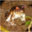

In [9]:
pic = array_to_img(x_train_all[0])
pic

In [10]:
y_train_all[0][0]

6

In [11]:
LABEL_NAMES[y_train_all[0][0]]

'Frog'

<function matplotlib.pyplot.show(close=None, block=None)>

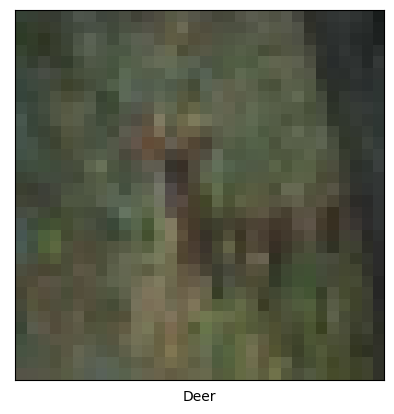

In [12]:
plt.imshow(x_train_all[10])
plt.xlabel(LABEL_NAMES[y_train_all[10][0]])
plt.xticks([])
plt.yticks([])
plt.show

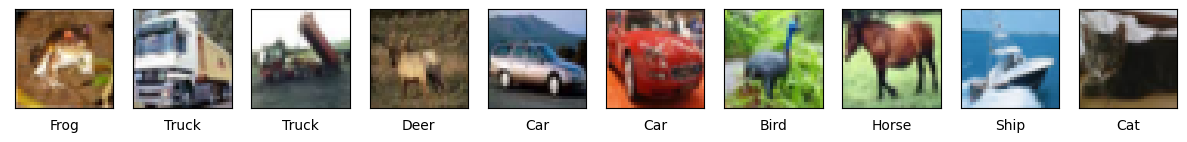

In [13]:
plt.figure(figsize = (15,7))
for i in range(10):
    
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]])
    plt.imshow(x_train_all[i])

In [14]:
x_train_all[0].shape

(32, 32, 3)

In [15]:
x_train_all, x_test = x_train_all/255, x_test/255

In [16]:
x_train_all[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [18]:
x_train_all.shape

(50000, 3072)

In [19]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [20]:
x_val.shape

(10000, 3072)

In [21]:
y_val.shape

(10000, 1)

In [22]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [23]:
x_train.shape

(40000, 3072)

In [24]:
y_train.shape

(40000, 1)

## Creating a Neural Network

In [25]:
# Defining

model_1 = Sequential([
    Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name = 'm1_hidden1'),
    Dense(units = 64, activation = 'relu', name = 'm1_hidden2'),
    Dense(units = 16, activation = 'relu', name = 'm1_hidden3'),
    Dense(units = 10, activation = 'softmax', name = 'm1_output')
    ])

In [26]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compilation

model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
#Fitting the model

nr_epochs = 75
history = model_1.fit(x_train, y_train, batch_size = 1000, epochs = nr_epochs, verbose = 1, validation_data = (x_val, y_val))
print(history.history.keys())

Epoch 1/75
40/40 [==============================] - 32s 280ms/step - loss: 2.2583 - accuracy: 0.1563 - val_loss: 2.1813 - val_accuracy: 0.1787
Epoch 2/75
40/40 [==============================] - 2s 46ms/step - loss: 2.1224 - accuracy: 0.2096 - val_loss: 2.0729 - val_accuracy: 0.2401
Epoch 3/75
40/40 [==============================] - 2s 39ms/step - loss: 2.0216 - accuracy: 0.2538 - val_loss: 1.9668 - val_accuracy: 0.2756
Epoch 4/75
40/40 [==============================] - 2s 37ms/step - loss: 1.9249 - accuracy: 0.2961 - val_loss: 1.8862 - val_accuracy: 0.3144
Epoch 5/75
40/40 [==============================] - 2s 43ms/step - loss: 1.8637 - accuracy: 0.3295 - val_loss: 1.8473 - val_accuracy: 0.3312
Epoch 6/75
40/40 [==============================] - 2s 42ms/step - loss: 1.8284 - accuracy: 0.3492 - val_loss: 1.8190 - val_accuracy: 0.3490
Epoch 7/75
40/40 [==============================] - 2s 38ms/step - loss: 1.7984 - accuracy: 0.3603 - val_loss: 1.7928 - val_accuracy: 0.3548
Epoch 8/75


Epoch 59/75
40/40 [==============================] - 2s 37ms/step - loss: 1.3374 - accuracy: 0.5251 - val_loss: 1.5126 - val_accuracy: 0.4688
Epoch 60/75
40/40 [==============================] - 2s 43ms/step - loss: 1.3345 - accuracy: 0.5279 - val_loss: 1.4810 - val_accuracy: 0.4732
Epoch 61/75
40/40 [==============================] - 2s 40ms/step - loss: 1.3315 - accuracy: 0.5289 - val_loss: 1.4729 - val_accuracy: 0.4751
Epoch 62/75
40/40 [==============================] - 2s 42ms/step - loss: 1.3273 - accuracy: 0.5295 - val_loss: 1.4786 - val_accuracy: 0.4750
Epoch 63/75
40/40 [==============================] - 2s 42ms/step - loss: 1.3217 - accuracy: 0.5333 - val_loss: 1.4852 - val_accuracy: 0.4760
Epoch 64/75
40/40 [==============================] - 2s 40ms/step - loss: 1.3177 - accuracy: 0.5354 - val_loss: 1.4831 - val_accuracy: 0.4698
Epoch 65/75
40/40 [==============================] - 2s 45ms/step - loss: 1.3153 - accuracy: 0.5343 - val_loss: 1.4641 - val_accuracy: 0.4783
Epoch 

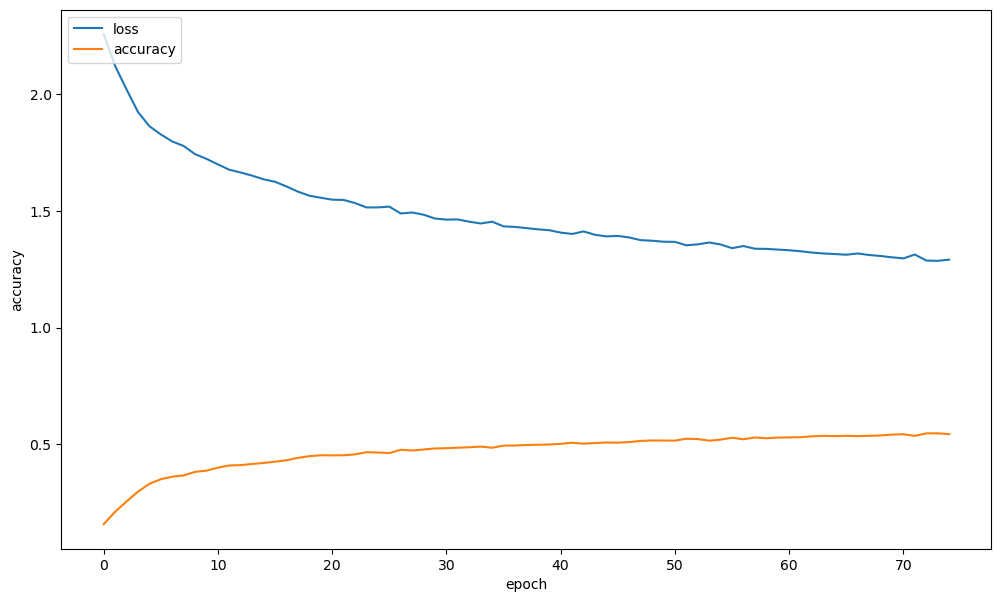

In [30]:
plt.figure(figsize = (12, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['loss', 'accuracy'], loc = 'upper left')
plt.show()

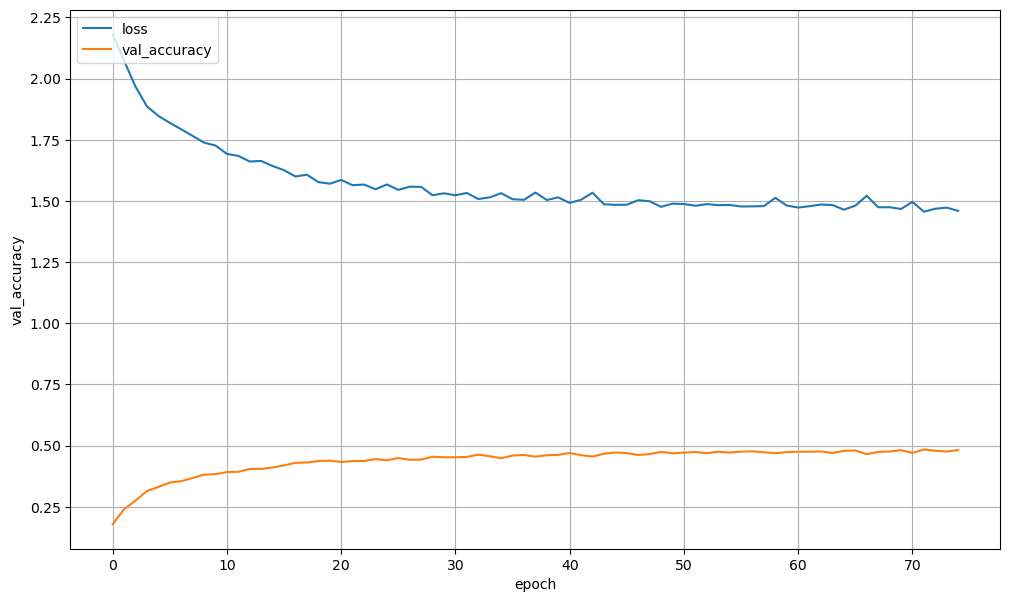

In [31]:
plt.figure(figsize = (12, 7))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.grid()
plt.ylabel('val_accuracy')
plt.legend(['loss', 'val_accuracy'], loc = 'upper left')
plt.show()

In [ ]:
# # Fitting the model

# nr_epochs = 1000
# history = model_1.fit(x_train, y_train, batch_size = 100, epochs = nr_epochs, verbose = 1, validation_data = (x_val, y_val))
# print(history.history.keys())

In [ ]:
# plt.figure(figsize = (10, 5))
# plt.plot(history.history['loss'])
# plt.plot(history.history['accuracy'])
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['loss', 'accuracy'], loc = 'upper right')
# plt.show()

In [ ]:
# plt.figure(figsize = (10, 5))
# plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_accuracy'])
# plt.xlabel('epoch')
# plt.grid()
# plt.ylabel('val_accuracy')
# plt.legend(['loss', 'val_accuracy'], loc = 'upper left')
# plt.show()

In [32]:
x_val[0].shape

(3072,)

In [33]:
test = np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 3072)

In [34]:
np.set_printoptions(precision = 3)

In [35]:
model_1.predict(test)

1/1 [==============================] - 1s 672ms/step


array([[0.016, 0.   , 0.131, 0.117, 0.284, 0.118, 0.259, 0.074, 0.   ,
        0.   ]], dtype=float32)

In [36]:
np.argmax(model_1.predict(test), axis =1 )[0]

1/1 [==============================] - 0s 40ms/step


4

In [37]:
y_val[0][0]

6

In [38]:
for number in range(20):
    test_img = np.expand_dims(x_val[number], axis = 0)
    predicted_val = np.argmax(model_1.predict(test_img)[0])
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

1/1 [==============================] - 0s 78ms/step
Actual value: 6 vs. predicted: 4
1/1 [==============================] - 0s 47ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 31ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 36ms/step
Actual value: 4 vs. predicted: 6
1/1 [==============================] - 0s 37ms/step
Actual value: 1 vs. predicted: 0
1/1 [==============================] - 0s 39ms/step
Actual value: 1 vs. predicted: 9
1/1 [==============================] - 0s 46ms/step
Actual value: 2 vs. predicted: 2
1/1 [==============================] - 0s 41ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 47ms/step
Actual value: 8 vs. predicted: 0
1/1 [==============================] - 0s 45ms/step
Actual value: 3 vs. predicted: 9
1/1 [==============================] - 0s 54ms/step
Actual value: 4 vs. predicted: 4
1/1 [==============================] - 0s 65ms/step
Actual value:

In [39]:
model_1.metrics_names

['loss', 'accuracy']

In [51]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)

In [52]:
x_test.shape

(10000, 3072)

In [53]:
y_test.shape

(10000, 1)

In [54]:
predictions = model_1.predict(x_test)

313/313 [==============================] - 3s 5ms/step


In [55]:
predictions = np.argmax(model_1.predict(x_test), axis = 1)

313/313 [==============================] - 1s 3ms/step


In [57]:
conf_mat = confusion_matrix(y_test, predictions)

In [58]:
print(conf_mat)

[[619  36  56  20  40  14  30  22  98  65]
 [ 65 562  19  22  16  11  17  20  74 194]
 [108  31 327  65 179  48 147  51  19  25]
 [ 49  25 101 257  87 154 198  44  33  52]
 [ 63  11 135  42 474  25 155  61  19  15]
 [ 32  15 101 188  98 306 126  64  38  32]
 [ 12   7  70  63 112  26 655  17  12  26]
 [ 59  20  67  62 141  58  41 476  15  61]
 [162  60  27  19  26   7  12  12 601  74]
 [ 59 137  16  19  22  16  36  42  61 592]]


In [61]:
accuracy_score(y_test, predictions)

0.4869

In [62]:
nr_rows = conf_mat.shape[0]
nr_columns = conf_mat.shape[1]

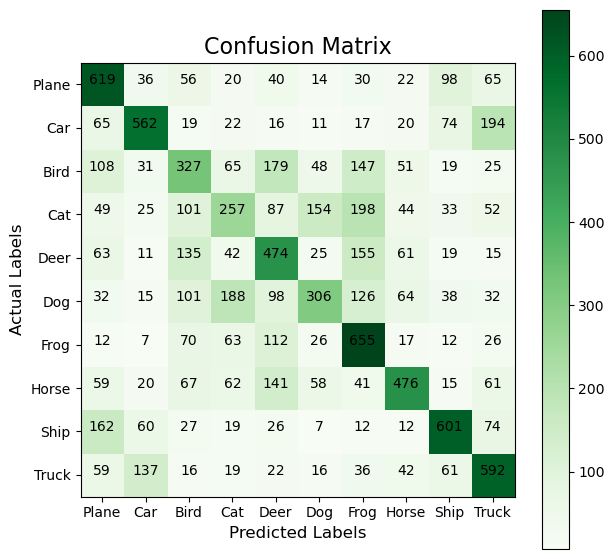

In [69]:
plt.figure(figsize = (7, 7))
plt.imshow(conf_mat, cmap = plt.cm.Greens)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

for i, j in itertools.product(range(nr_rows), range(nr_columns)):
    plt.text(j, i, conf_mat[i,j], horizontalalignment = 'center')

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()
plt.show()